In [ ]:
# Siddharth Nagepalli 210968074
# Batch 3
# Week 4
# Exercise 1

In [ ]:
# Exercise 1 – Data Preprocessing, Regression
# Using the given CEREALS dataset, perform data preprocessing and answer the following questions.

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [160]:
df=pd.read_excel("Cereals1.xls")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [161]:
# Q1) Create a table with the 5-number summary of all the numeric attributes

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [162]:
# Converting -1 to NaN

df=df.mask(df==-1)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [163]:
# Q2) For each of the numeric attributes (proteins up to vitamins), identify and replace all missing data (indicated with -1) with the arithmetic mean of the attribute.
# Part A-Identifying

df.notnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
72,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
73,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
74,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [164]:
# Part B- Replacing

df=df.fillna(df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].mean())
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,96.216216,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [165]:
# Q3) Create a table with the 5-number summary of all the numeric attributes after treating missing values. 
#     Do you think the strategy used in dealing with missing values was effective?

df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474
std,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [166]:
# 4) For each of the numeric attributes (proteins up to vitamins), identify and replace all noisy data with the median of attribute.

for col in ["protein","fat", "sodium", "fiber","carbo","sugars","potass","vitamins"]:

    Q1 = df[col].quantile(0.25)


    Q3 = df[col].quantile(0.75)


    IQR = Q3 - Q1


    upper = Q3+ 1.5 * IQR
    lower = Q1- 1.5*IQR
    df.loc[df[col]>upper, col] = np.NaN
    df.loc[df[col]<lower, col] = np.NaN
    df[col].fillna(df[col].median(), inplace=True)

    
    



In [167]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1.0,260.0,1.5,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0.0,140.0,1.5,8.0,0.0,90.000000,25.0,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2.0,200.0,1.0,14.0,8.0,96.216216,25.0,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2.0,180.0,1.5,10.5,10.0,70.000000,25.0,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1.0,250.0,0.0,21.0,3.0,60.000000,25.0,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1.0,140.0,0.0,13.0,12.0,25.000000,25.0,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1.0,230.0,3.0,17.0,3.0,115.000000,25.0,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1.0,200.0,3.0,17.0,3.0,110.000000,25.0,1,1.0,1.00,51.592193


In [168]:
# 5) Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective?

df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,2.381579,1.013158,182.565789,1.785526,14.933333,7.040000,85.821479,25.0
std,0.878895,1.013159,60.246679,1.520939,3.737498,4.377031,48.062504,0.0
min,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0
25%,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0
50%,2.000000,1.000000,190.000000,1.500000,14.966667,7.000000,90.000000,25.0
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0
max,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0


In [169]:
# 6) Cross tabulate the type of cereal (hot vs cold) against the manufacturer

pd.crosstab(df.type,df.mfr)


mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [170]:
# 7) Which is the cereal with the best rating, worst rating

best_rating=df['name'].loc[df.rating.idxmax()]
worst_rating=df['name'].loc[df.rating.idxmin()]
print("best rated cereal= ",best_rating)
print("worst rated cereal= ",worst_rating)


best rated cereal=  All-Bran_with_Extra_Fiber
worst rated cereal=  Cap'n'Crunch


<AxesSubplot:xlabel='type', ylabel='rating'>

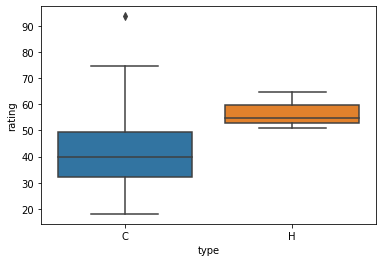

In [171]:
# 8) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

plot= sns.boxplot(x='type',y='rating',data=df)
plot

In [172]:
# 9) Is there a relation between sugars, calories, carbs, and fat?

x=df[['sugars','calories','carbo','fat']].corr()
x

,sugars,calories,carbo,fat
sugars,1.000000,0.574182,-0.501086,0.300664
calories,0.574182,1.000000,0.207331,0.510630
carbo,-0.501086,0.207331,1.000000,-0.311619
fat,0.300664,0.510630,-0.311619,1.000000


<AxesSubplot:>

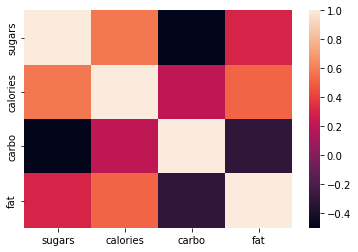

In [173]:
sns.heatmap(x)

In [174]:
# 10) Which manufacturers produce cereal with highest calories?

x=df['mfr'].loc[df['calories'].idxmax()]
print('manufacturers which produce cereal with highest calories are: ',x)

manufacturers which produce cereal with highest calories are:  K


In [177]:
# 11) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

from scipy.stats import f_oneway
f_oneway(df.calories,df.rating)

F_onewayResult(statistic=576.8786819375374, pvalue=2.88283004391097e-53)

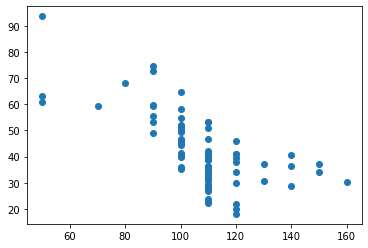

In [178]:
plt.scatter(x=df.calories,y=df.rating)

In [181]:
# 12) Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?

from scipy.stats import chi2_contingency
chi2_contingency(df.shelf,df.rating)


(0.0,
 1.0,
 0,
 array([3., 3., 3., 3., 1., 2., 3., 1., 3., 2., 1., 2., 3., 2., 1., 1., 2.,
        2., 3., 2., 3., 3., 3., 2., 1., 2., 3., 3., 2., 1., 2., 3., 3., 3.,
        2., 1., 1., 3., 3., 2., 2., 2., 2., 3., 3., 3., 1., 2., 3., 3., 3.,
        3., 3., 3., 3., 3., 1., 2., 3., 3., 1., 1., 1., 1., 1., 2., 1., 2.,
        3., 3., 3., 3., 2., 1., 1., 1.]))

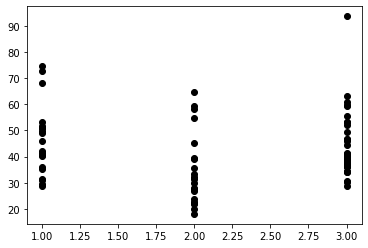

In [182]:
plt.scatter(x=df.shelf,y=df.rating,c="black")

In [180]:
# 13) Is there a relation between manufacturer and rating?

from scipy.stats import f_oneway

f_oneway(df['rating'][df['mfr'] == 'K'],
               df['rating'][df['mfr'] == 'G'],
               df['rating'][df['mfr'] == 'A'],df['rating'][df['mfr'] == 'N'],
               df['rating'][df['mfr'] == 'N'],df['rating'][df['mfr'] == 'Q'],
               df['rating'][df['mfr'] == 'R'])

F_onewayResult(statistic=9.667939873197838, pvalue=1.364074160189325e-07)

<AxesSubplot:>

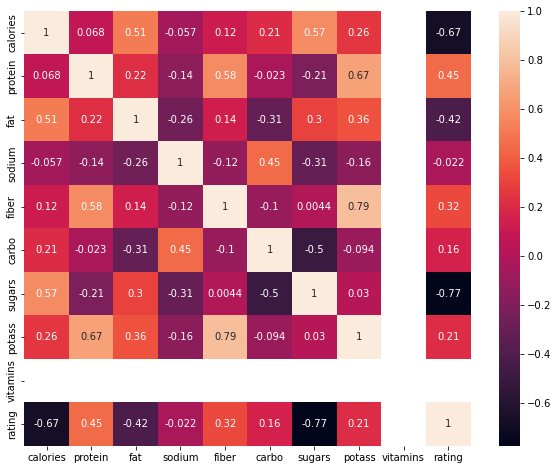

In [176]:
# 14) Which nutrients are essential for a good rating for a cereal?

plt.figure(figsize = (10,8))
sns.heatmap(df[[ 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins','rating']].corr(), annot = True,)

In [ ]:
# As Rating is highly negatively corrrelated with sugar. This means the lesser the sugar, higher the rating.